In [312]:
from netCDF4 import Dataset
from wrf import getvar, ALL_TIMES, extract_times,ll_to_xy
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)
import xarray as xr
from glob import glob
import pyart
# import cartopy
import geopandas as gpd
import rioxarray
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy
# from mpl_toolkits.basemap import Basemap
# sys.path.append('~/PlotGallery')
from matplotlibconfig import basic
basic()
# import proplot as pplt
# pplt.rc.update({'meta.width': 1, 'label.weight': 'bold', 'tick.labelweight': 'bold'})

In [31]:
dict_hurricanes= {
    'Barry': {'datetime': [], 'points':[]},
    'Beta': {'datetime': [], 'points':[]},
    'Cindy': {'datetime': [], 'points':[]},
    'Delta': {'datetime': [], 'points':[]},
    'Hanna': {'datetime': [], 'points':[]},
    'Harvey': {'datetime': [], 'points':[]},
    'Imelda': {'datetime': [], 'points':[]},
    'Laura': {'datetime': [], 'points':[]},
    'Florence': {'datetime': [], 'points': []}
}

In [32]:
for event in dict_hurricanes.keys():
    fname= glob('tracks/%s/*_pts.shp'%(event))[0]
    pnts= gpd.read_file(fname)
    pnts.DTG= pd.to_datetime(pnts.DTG, format='%Y%m%d%H')
    dict_hurricanes[event]['datetime']= sorted(pnts.DTG.tolist())
    order= np.argsort(pnts.DTG.values)
    dict_hurricanes[event]['points']= list(zip(pnts.LON.values[order], pnts.LAT.values[order]))

In [2]:
domain= gpd.read_file('area/great_extent.shp').to_crs('EPSG:4326')

In [258]:
real_track= gpd.read_file('tracks/Florence/AL062018_pts.shp')
xy_track= np.stack([geo.coords[0] for geo in real_track.geometry])
time =pd.to_datetime(real_track.DTG, format='%Y%m%d%H')
real_track['datetime']= time
real_track.set_index('datetime', inplace=True)

get Run 1 storm track

In [305]:
fnames= sorted(glob('/home/ZhiLi/soilmoisture/data/rain/gfs_2domains_091212/wrfout_d01*'))
wrf_list= [Dataset(fn) for fn in fnames]


slps= getvar(wrf_list, 'slp', timeidx=ALL_TIMES, method='cat')
smooth_slps = [smooth2d(slp, 3, cenweight=10) for slp in slps]
smooth_slps= xr.concat(smooth_slps, dim='Time').sel(Time=slice('20180913', '20180917'))

localmin=smooth_slps.argmin(dim=['west_east','south_north'])
_lon= smooth_slps.XLONG.sel(west_east=localmin['west_east'], south_north=localmin['south_north']).values
_lat= smooth_slps.XLAT.sel(west_east=localmin['west_east'], south_north=localmin['south_north']).values
sim_track1= pd.DataFrame()
sim_track1['lon']= _lon
sim_track1['lat']= _lat
sim_track1['time']= pd.to_datetime(smooth_slps.Time.values)



get Run 2 storm track

In [320]:
fnames= sorted(glob('/home/ZhiLi/soilmoisture/data/rain/gfs_2domains_091212_10/wrfout_d01*'))
wrf_list= [Dataset(fn) for fn in fnames]


slps= getvar(wrf_list, 'slp', timeidx=ALL_TIMES, method='cat')
smooth_slps = [smooth2d(slp, 3, cenweight=10) for slp in slps]
smooth_slps= xr.concat(smooth_slps, dim='Time').sel(Time=slice('20180913', '20180917'))

localmin=smooth_slps.argmin(dim=['west_east','south_north'])
_lon= smooth_slps.XLONG.sel(west_east=localmin['west_east'], south_north=localmin['south_north']).values
_lat= smooth_slps.XLAT.sel(west_east=localmin['west_east'], south_north=localmin['south_north']).values
sim_track2= pd.DataFrame()
sim_track2['lon']= _lon
sim_track2['lat']= _lat
sim_track2['time']= pd.to_datetime(smooth_slps.Time.values)

Get Run 3 storm track

In [327]:
fnames= sorted(glob('/home/ZhiLi/soilmoisture/data/rain/gfs_2domains_091212_clima/wrfout_d01*'))
wrf_list= [Dataset(fn) for fn in fnames]


slps= getvar(wrf_list, 'slp', timeidx=ALL_TIMES, method='cat')
smooth_slps = [smooth2d(slp, 3, cenweight=10) for slp in slps]
smooth_slps= xr.concat(smooth_slps, dim='Time').sel(Time=slice('20180913', '20180917'))

localmin=smooth_slps.argmin(dim=['west_east','south_north'])
_lon= smooth_slps.XLONG.sel(west_east=localmin['west_east'], south_north=localmin['south_north']).values
_lat= smooth_slps.XLAT.sel(west_east=localmin['west_east'], south_north=localmin['south_north']).values
sim_track3= pd.DataFrame()
sim_track3['lon']= _lon
sim_track3['lat']= _lat
sim_track3['time']= pd.to_datetime(smooth_slps.Time.values)

get Run 4 storm track

In [326]:
fnames= sorted(glob('/home/ZhiLi/soilmoisture/data/rain/gfs_2domains_091212_120/wrfout_d01*'))
wrf_list= [Dataset(fn) for fn in fnames]


slps= getvar(wrf_list, 'slp', timeidx=ALL_TIMES, method='cat')
smooth_slps = [smooth2d(slp, 3, cenweight=10) for slp in slps]
smooth_slps= xr.concat(smooth_slps, dim='Time').sel(Time=slice('20180913', '20180917'))

localmin=smooth_slps.argmin(dim=['west_east','south_north'])
_lon= smooth_slps.XLONG.sel(west_east=localmin['west_east'], south_north=localmin['south_north']).values
_lat= smooth_slps.XLAT.sel(west_east=localmin['west_east'], south_north=localmin['south_north']).values
sim_track4= pd.DataFrame()
sim_track4['lon']= _lon
sim_track4['lat']= _lat
sim_track4['time']= pd.to_datetime(smooth_slps.Time.values)

get Run 5 storm track

In [322]:
fnames= sorted(glob('/home/ZhiLi/soilmoisture/data/rain/gfs_2domains_091212_150/wrfout_d01*'))
wrf_list= [Dataset(fn) for fn in fnames]


slps= getvar(wrf_list, 'slp', timeidx=ALL_TIMES, method='cat')
smooth_slps = [smooth2d(slp, 3, cenweight=10) for slp in slps]
smooth_slps= xr.concat(smooth_slps, dim='Time').sel(Time=slice('20180913', '20180917'))

localmin=smooth_slps.argmin(dim=['west_east','south_north'])
_lon= smooth_slps.XLONG.sel(west_east=localmin['west_east'], south_north=localmin['south_north']).values
_lat= smooth_slps.XLAT.sel(west_east=localmin['west_east'], south_north=localmin['south_north']).values
sim_track5= pd.DataFrame()
sim_track5['lon']= _lon
sim_track5['lat']= _lat
sim_track5['time']= pd.to_datetime(smooth_slps.Time.values)

In [7]:
lccProjParams = { 'central_latitude'   : 50.0, # same as lat_0 in proj4 string 
                  'central_longitude'  : -96.0, # same as lon_0
                  'standard_parallels' : (33.0, 45.0) # same as (lat_1, lat_2)
}
proj = ccrs.LambertConformal(**lccProjParams)

In [8]:
from cartopy import feature

In [14]:
colors=["#00366C","#004E8C","#0068AC","#4A83BA","#81A2CB","#E24C80","#EB6E75","#F28D6F","#F6A972","#F9C480","#004616","#006724","#008932","#55A569","#8FC19A"]

In [153]:
import matplotlib

In [181]:
norm = matplotlib.colors.Normalize(vmin=time[0].timestamp()//21600, vmax=time.iloc[-1].timestamp()//21600)
cmap= plt.get_cmap('viridis')

/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


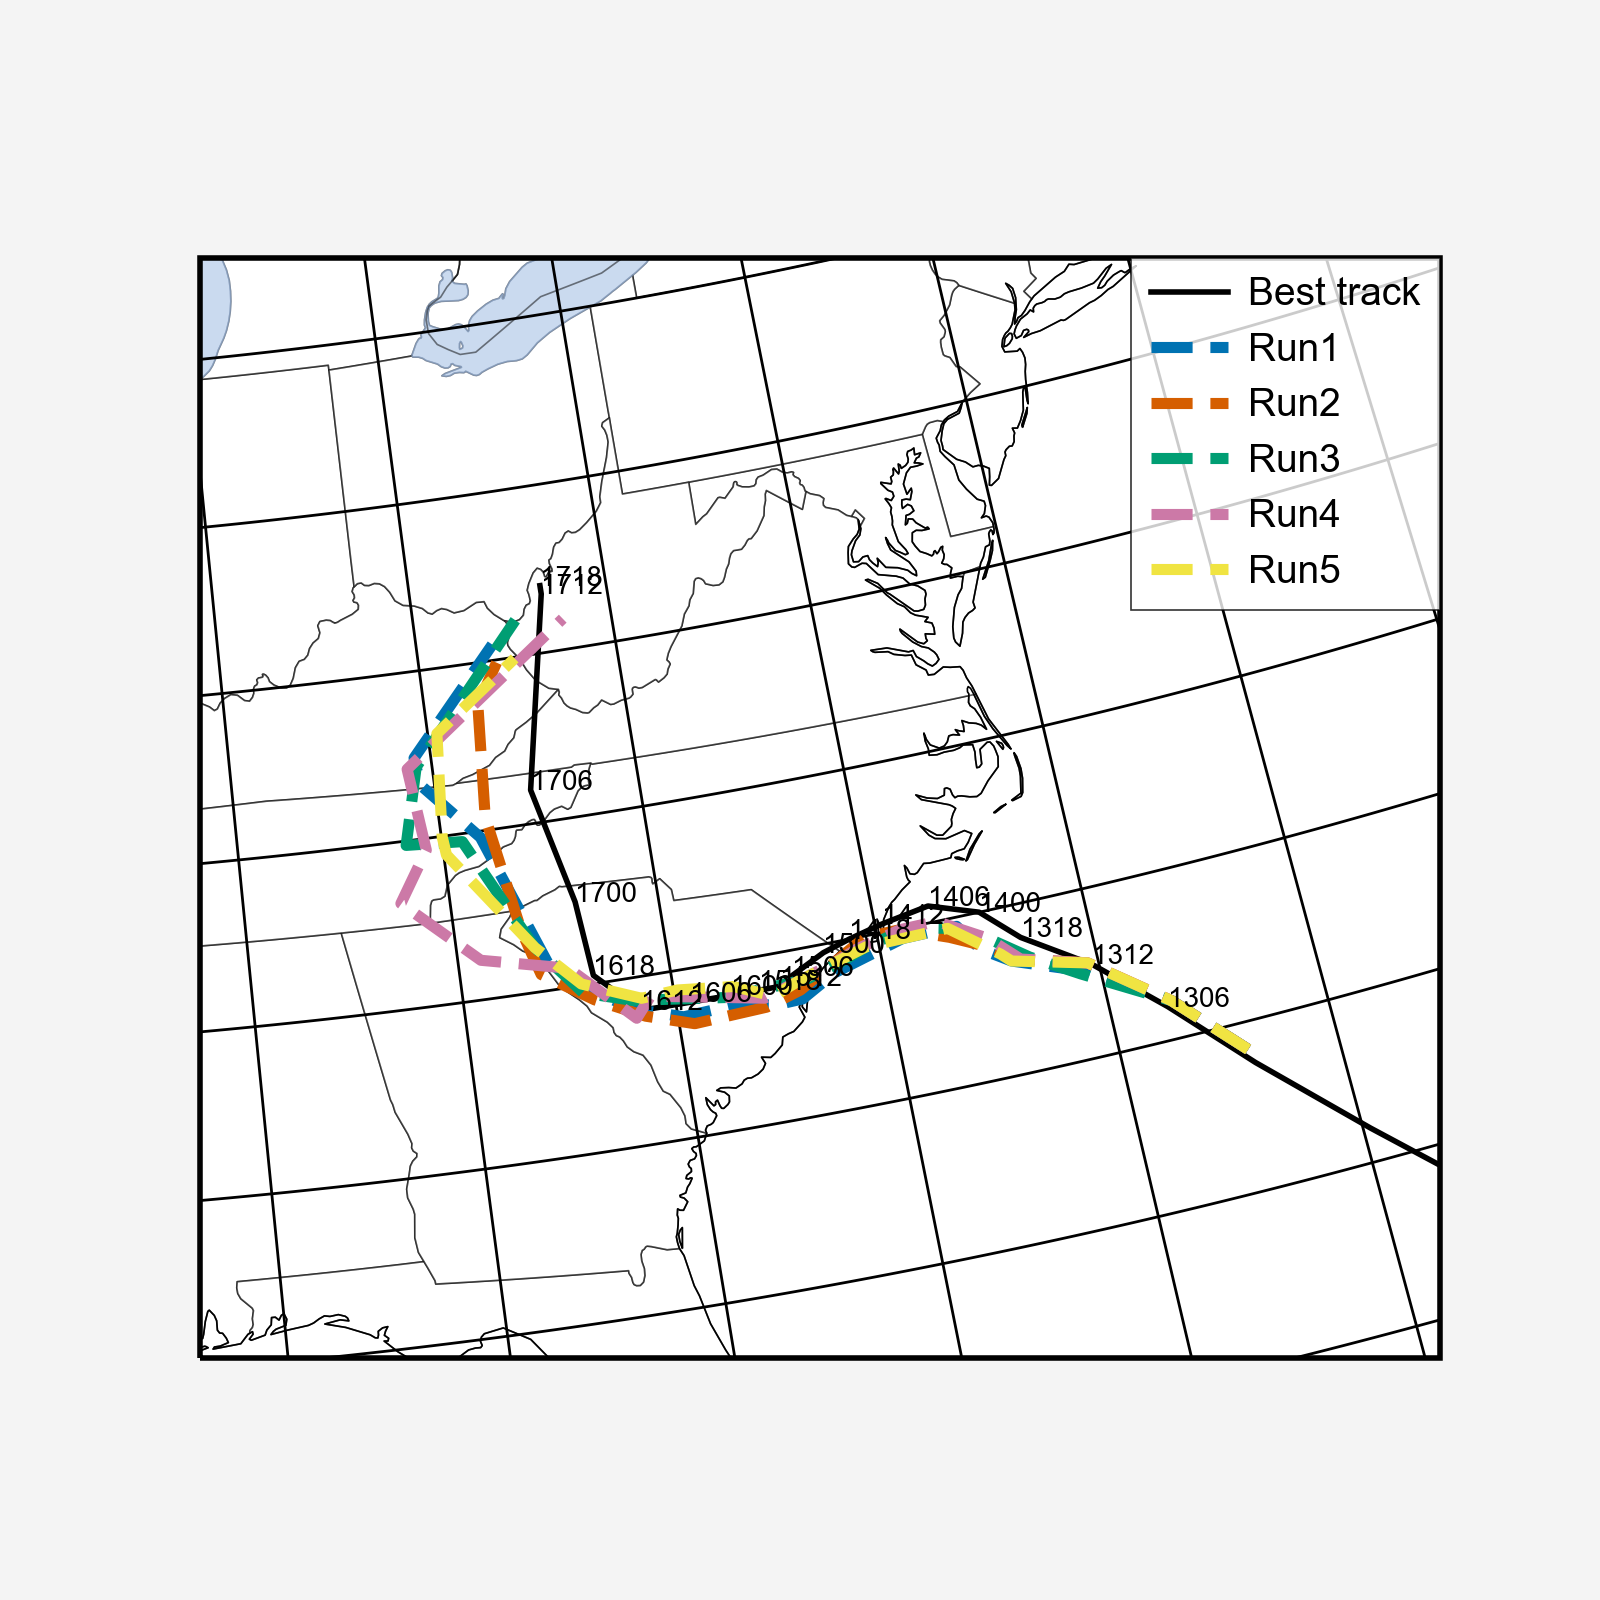

In [328]:
fig= plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection=proj)
ax.plot(xy_track[:,0], xy_track[:,1], color='k', linewidth=2, transform=ccrs.PlateCarree(), label='Best track')
for i in range(len(xy_track)):
    if xy_track[i,0]<-74:
        ax.text(xy_track[i,0], xy_track[i,1], time[i].strftime('%d%H'), transform=ccrs.PlateCarree(), fontsize=10)
ax.scatter(xy_track[:,0], xy_track[:,1],c=[cmap(norm(dt.timestamp()//21600)) for dt in time],
           s=100, transform=ccrs.PlateCarree())
# Run 1
ax.plot(sim_track1['lon'], sim_track1['lat'], transform=ccrs.PlateCarree(), linewidth=4,
        linestyle='dashed', label='Run1')
time_wrf= pd.date_range('20180913000000', periods=len(sim_track1['lon']),freq='6H')
ax.scatter(sim_track1.lon, sim_track1.lat,c=[cmap(norm(dt.timestamp()//21600)) for dt in time_wrf],
           s=100, transform=ccrs.PlateCarree())
# Run 2
ax.plot(sim_track2['lon'], sim_track2['lat'], transform=ccrs.PlateCarree(), linewidth=4,
        linestyle='dashed', label='Run2')
time_wrf= pd.date_range('20180913000000', periods=len(sim_track1['lon']),freq='6H')
ax.scatter(sim_track2.lon, sim_track2.lat,c=[cmap(norm(dt.timestamp()//21600)) for dt in time_wrf],
           s=100, transform=ccrs.PlateCarree())

# Run 3
ax.plot(sim_track3['lon'], sim_track3['lat'], transform=ccrs.PlateCarree(), linewidth=4,
        linestyle='dashed', label='Run3')
time_wrf= pd.date_range('20180913000000', periods=len(sim_track1['lon']),freq='6H')
ax.scatter(sim_track3.lon, sim_track3.lat,c=[cmap(norm(dt.timestamp()//21600)) for dt in time_wrf],
           s=100, transform=ccrs.PlateCarree())
# Run 4
ax.plot(sim_track4['lon'], sim_track4['lat'], transform=ccrs.PlateCarree(), linewidth=4,
        linestyle='dashed', label='Run4')
time_wrf= pd.date_range('20180913000000', periods=len(sim_track1['lon']),freq='6H')
ax.scatter(sim_track4.lon, sim_track4.lat,c=[cmap(norm(dt.timestamp()//21600)) for dt in time_wrf],
           s=100, transform=ccrs.PlateCarree())

# Run 5
ax.plot(sim_track5['lon'], sim_track5['lat'], transform=ccrs.PlateCarree(), linewidth=4,
        linestyle='dashed', label='Run5')
time_wrf= pd.date_range('20180913000000', periods=len(sim_track1['lon']),freq='6H')
ax.scatter(sim_track5.lon, sim_track5.lat,c=[cmap(norm(dt.timestamp()//21600)) for dt in time_wrf],
           s=100, transform=ccrs.PlateCarree())

ax.legend()
ax.add_feature(feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none'))
ax.add_feature(feature.NaturalEarthFeature(
        category='physical',
        name='lakes',
        scale='50m',
        facecolor='none'))
ax.coastlines('50m')
ax.add_feature(feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.STATES, alpha=0.6, facecolor='w', zorder=0)
ax.add_feature(feature.BORDERS, linestyle='-', alpha=.5)
ax.gridlines()
ax.set_extent([-86.96, -71.03316, 30.04, 40.97469]);

In [195]:
pd.DatetimeIndex(time).get_loc(sim_tracks.time[1])

56

In [196]:
from shapely.geometry import Point

In [203]:
real_track.iloc[[pd.DatetimeIndex(time).get_loc(sim_tracks.time[1])]].distance(Point([sim_tracks.iloc[0,0], sim_tracks.iloc[0,1]]))

/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


56    1.192047
dtype: float64

In [249]:
gpd.GeoDataFrame(geometry=gpd.points_from_xy([sim_tracks.iloc[0,0]],
                                            [sim_tracks.iloc[0,1]])).\
                              set_crs('epsg:4326').to_crs('epsg:32217').geometry

In [257]:
real_track.iloc[[pd.DatetimeIndex(time).get_loc(sim_tracks.time[0])]].to_crs('epsg:32217').geometry.distance(_)

/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0    NaN
55   NaN
dtype: float64

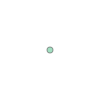

In [264]:
_.geometry[0]

In [265]:
real_track.to_crs('epsg:32217').loc[[sim_tracks.time[0]]].distance(_.geometry[0])

datetime
2018-09-13    20033.958
dtype: float64

In [266]:
sim_tracks['dist'] = [real_track.loc[[sim_tracks.time[i]]].to_crs('epsg:32217').\
                      distance(gpd.GeoDataFrame(geometry=gpd.points_from_xy([sim_tracks.iloc[i,0]],
                                                                            [sim_tracks.iloc[i,1]])).\
                              set_crs('epsg:4326').to_crs('epsg:32217').geometry[0]).values[0] \
                      for i, dt in enumerate(sim_tracks.time.values)]

In [267]:
sim_tracks

,lon,lat,time,dist,sim_SLP,obs_SLP
0,-73.255127,31.673233,2018-09-13 00:00:00,20033.958000,983.060608,955.0
1,-74.127930,32.456829,2018-09-13 06:00:00,9285.508798,979.159180,955.0
2,-75.154572,33.017155,2018-09-13 12:00:00,10552.124951,977.067261,954.0
3,-76.197693,33.348591,2018-09-13 18:00:00,33478.021846,973.669434,953.0
4,-76.592346,33.565762,2018-09-14 00:00:00,49008.011647,969.684998,952.0
5,-76.859253,33.892258,2018-09-14 06:00:00,46475.268999,967.233643,952.0
6,-77.651001,33.881954,2018-09-14 12:00:00,33396.599968,971.539124,957.0
7,-78.175079,33.761986,2018-09-14 18:00:00,33621.946574,974.427734,969.0
8,-78.697266,33.639221,2018-09-15 00:00:00,30453.849480,978.728394,978.0
9,-79.212219,33.404377,2018-09-15 06:00:00,33784.764046,984.445129,986.0


In [215]:
sim_tracks['obs_SLP'] = [real_track.iloc[[pd.DatetimeIndex(time).get_loc(sim_tracks.time[i])],6].values[0]\
                      for i, dt in enumerate(sim_tracks.time.values)]

In [219]:
sim_tracks['sim_SLP']= smooth_slps.min(dim=['south_north', 'west_east']).values

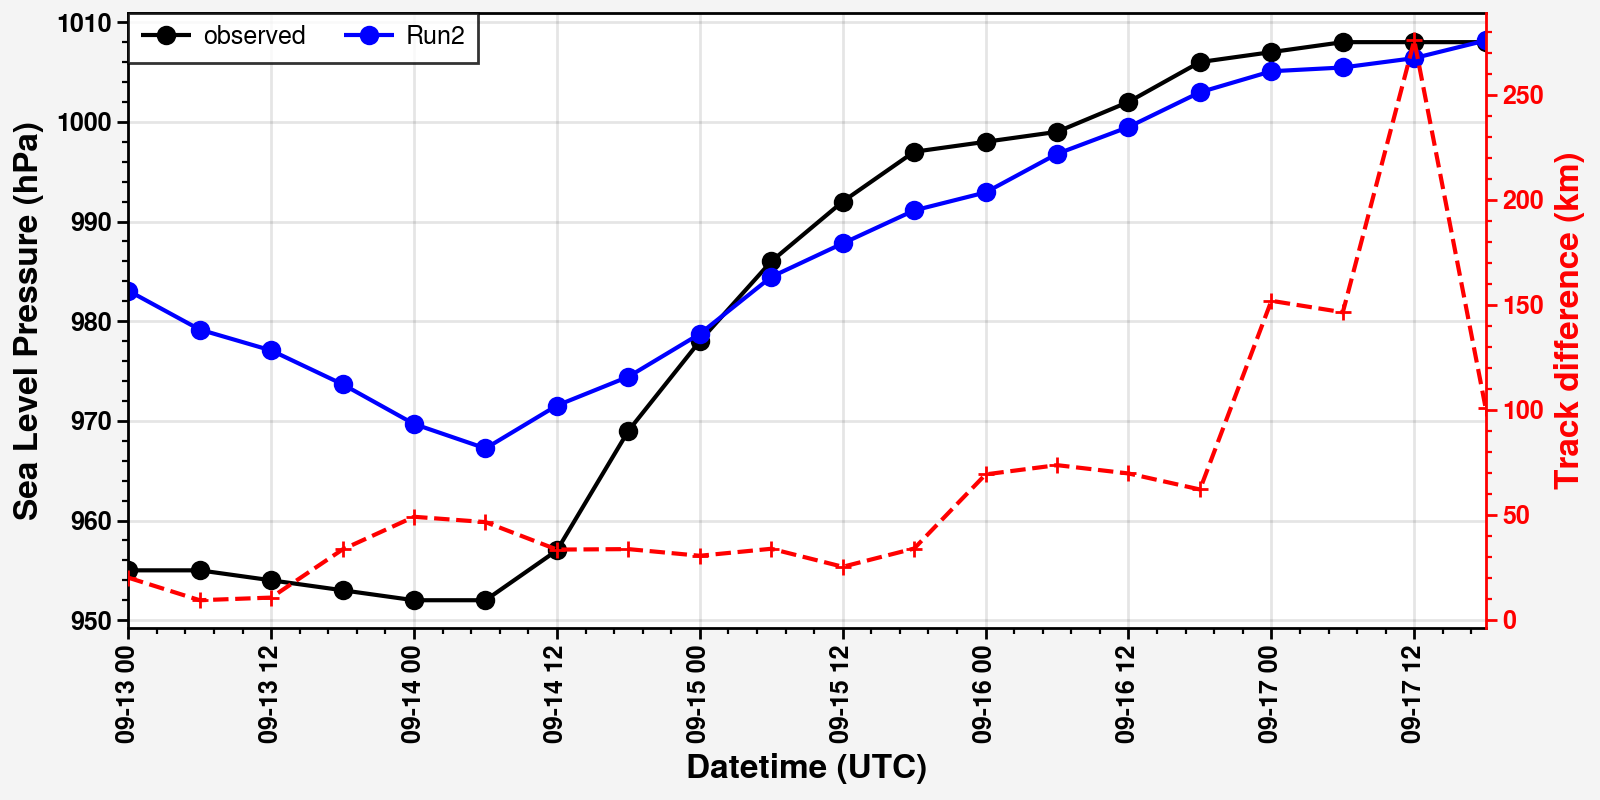

In [304]:
fig= pplt.figure(figsize=(8,4))
ax=fig.add_subplot(111)
ax.plot(sim_tracks.time, sim_tracks.obs_SLP, color='k', marker='o', label='observed')
ax.plot(sim_tracks.time, sim_tracks.sim_SLP, color='b', marker='o', label='Run2')
ax.legend()

ax.set_xlabel('Datetime (UTC)', fontsize=12)
ax.set_ylabel('Sea Level Pressure (hPa)', fontsize=12)
ax2= ax.alty(color='red')
ax2.plot(sim_tracks.time, sim_tracks.dist/1000., color='r', linestyle='dashed', marker='+')
ax2.set_ylabel('Track difference (km)', fontsize=12, color='r');
# sim_tracks[['sim_SLP', 'obs_SLP']].plot()

# Rainfall

In [365]:
base_dir= '/media/scratch/ZhiLi/StageIV'

for event in dict_hurricanes.keys():
    if event=='Florence':
        start= pd.to_datetime('20180912000000')
        end= pd.to_datetime('20180920000000')
        fnames= [os.path.join(base_dir, dt.strftime('ST4.%Y%m%d%H.01h')) for dt in pd.date_range(start, end, freq='H')]
        time= xr.Variable('time', pd.date_range(start, end, freq='H'))
        rains= [xr.open_rasterio(fn).squeeze().rio.reproject('epsg:4326').sel(x=slice(-83.4, -74),
                                                                              y=slice(38.13,32.09)) for fn in fnames]
        rains = xr.concat(rains, dim=time)
        break
#         cliped= rains.rio.clip(AOI)
rains= rains.where(rains<1000)

In [329]:
def get_acc_rain(run):
    if run==1:
        folders= '/home/ZhiLi/soilmoisture/data/rain/gfs_2domains_091212/wrfout_d02*'
    elif run==2:
        folders= '/home/ZhiLi/soilmoisture/data/rain/gfs_2domains_091212_10/wrfout_d02*'
    elif run==3:
        folders= '/home/ZhiLi/soilmoisture/data/rain/gfs_2domains_091212_clima/wrfout_d02*'
    elif run==4:
        folders= '/home/ZhiLi/soilmoisture/data/rain/gfs_2domains_091212_120/wrfout_d02*'
    elif run==5:
        folders= '/home/ZhiLi/soilmoisture/data/rain/gfs_2domains_091212_150/wrfout_d02*'        


    fnames= sorted(glob(folders))
    wrf_list= [Dataset(fn) for fn in fnames]


    rain= getvar(wrf_list, 'RAINNC', timeidx=ALL_TIMES, method='cat')
    return rain

In [38]:
from matplotlib.colors import from_levels_and_colors

In [40]:
cmap_precip= pyart.graph.cm.NWSRef

Run 1

/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: ProplotWarning: 'subplot_kw' is not necessary in proplot. Pass the parameters as keyword arguments instead.
  
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: ProplotWarning: Ignoring unused keyword arg(s): {'vmax': 800}
  import sys
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:17: ProplotWarning: Ignoring unused keyword arg(s): {'vmax': 800}
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:26: ProplotWarning: Ignoring unused keyword arg(s): {'vmax': 800}
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: ProplotWarning: Ignoring unused keyword arg(s): {'vmax': 800}
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:44: ProplotWarning: Ignoring unused keyword arg(s): {'vmax': 800}
/home/ZhiLi/.conda/envs/xesmf_env/lib/py

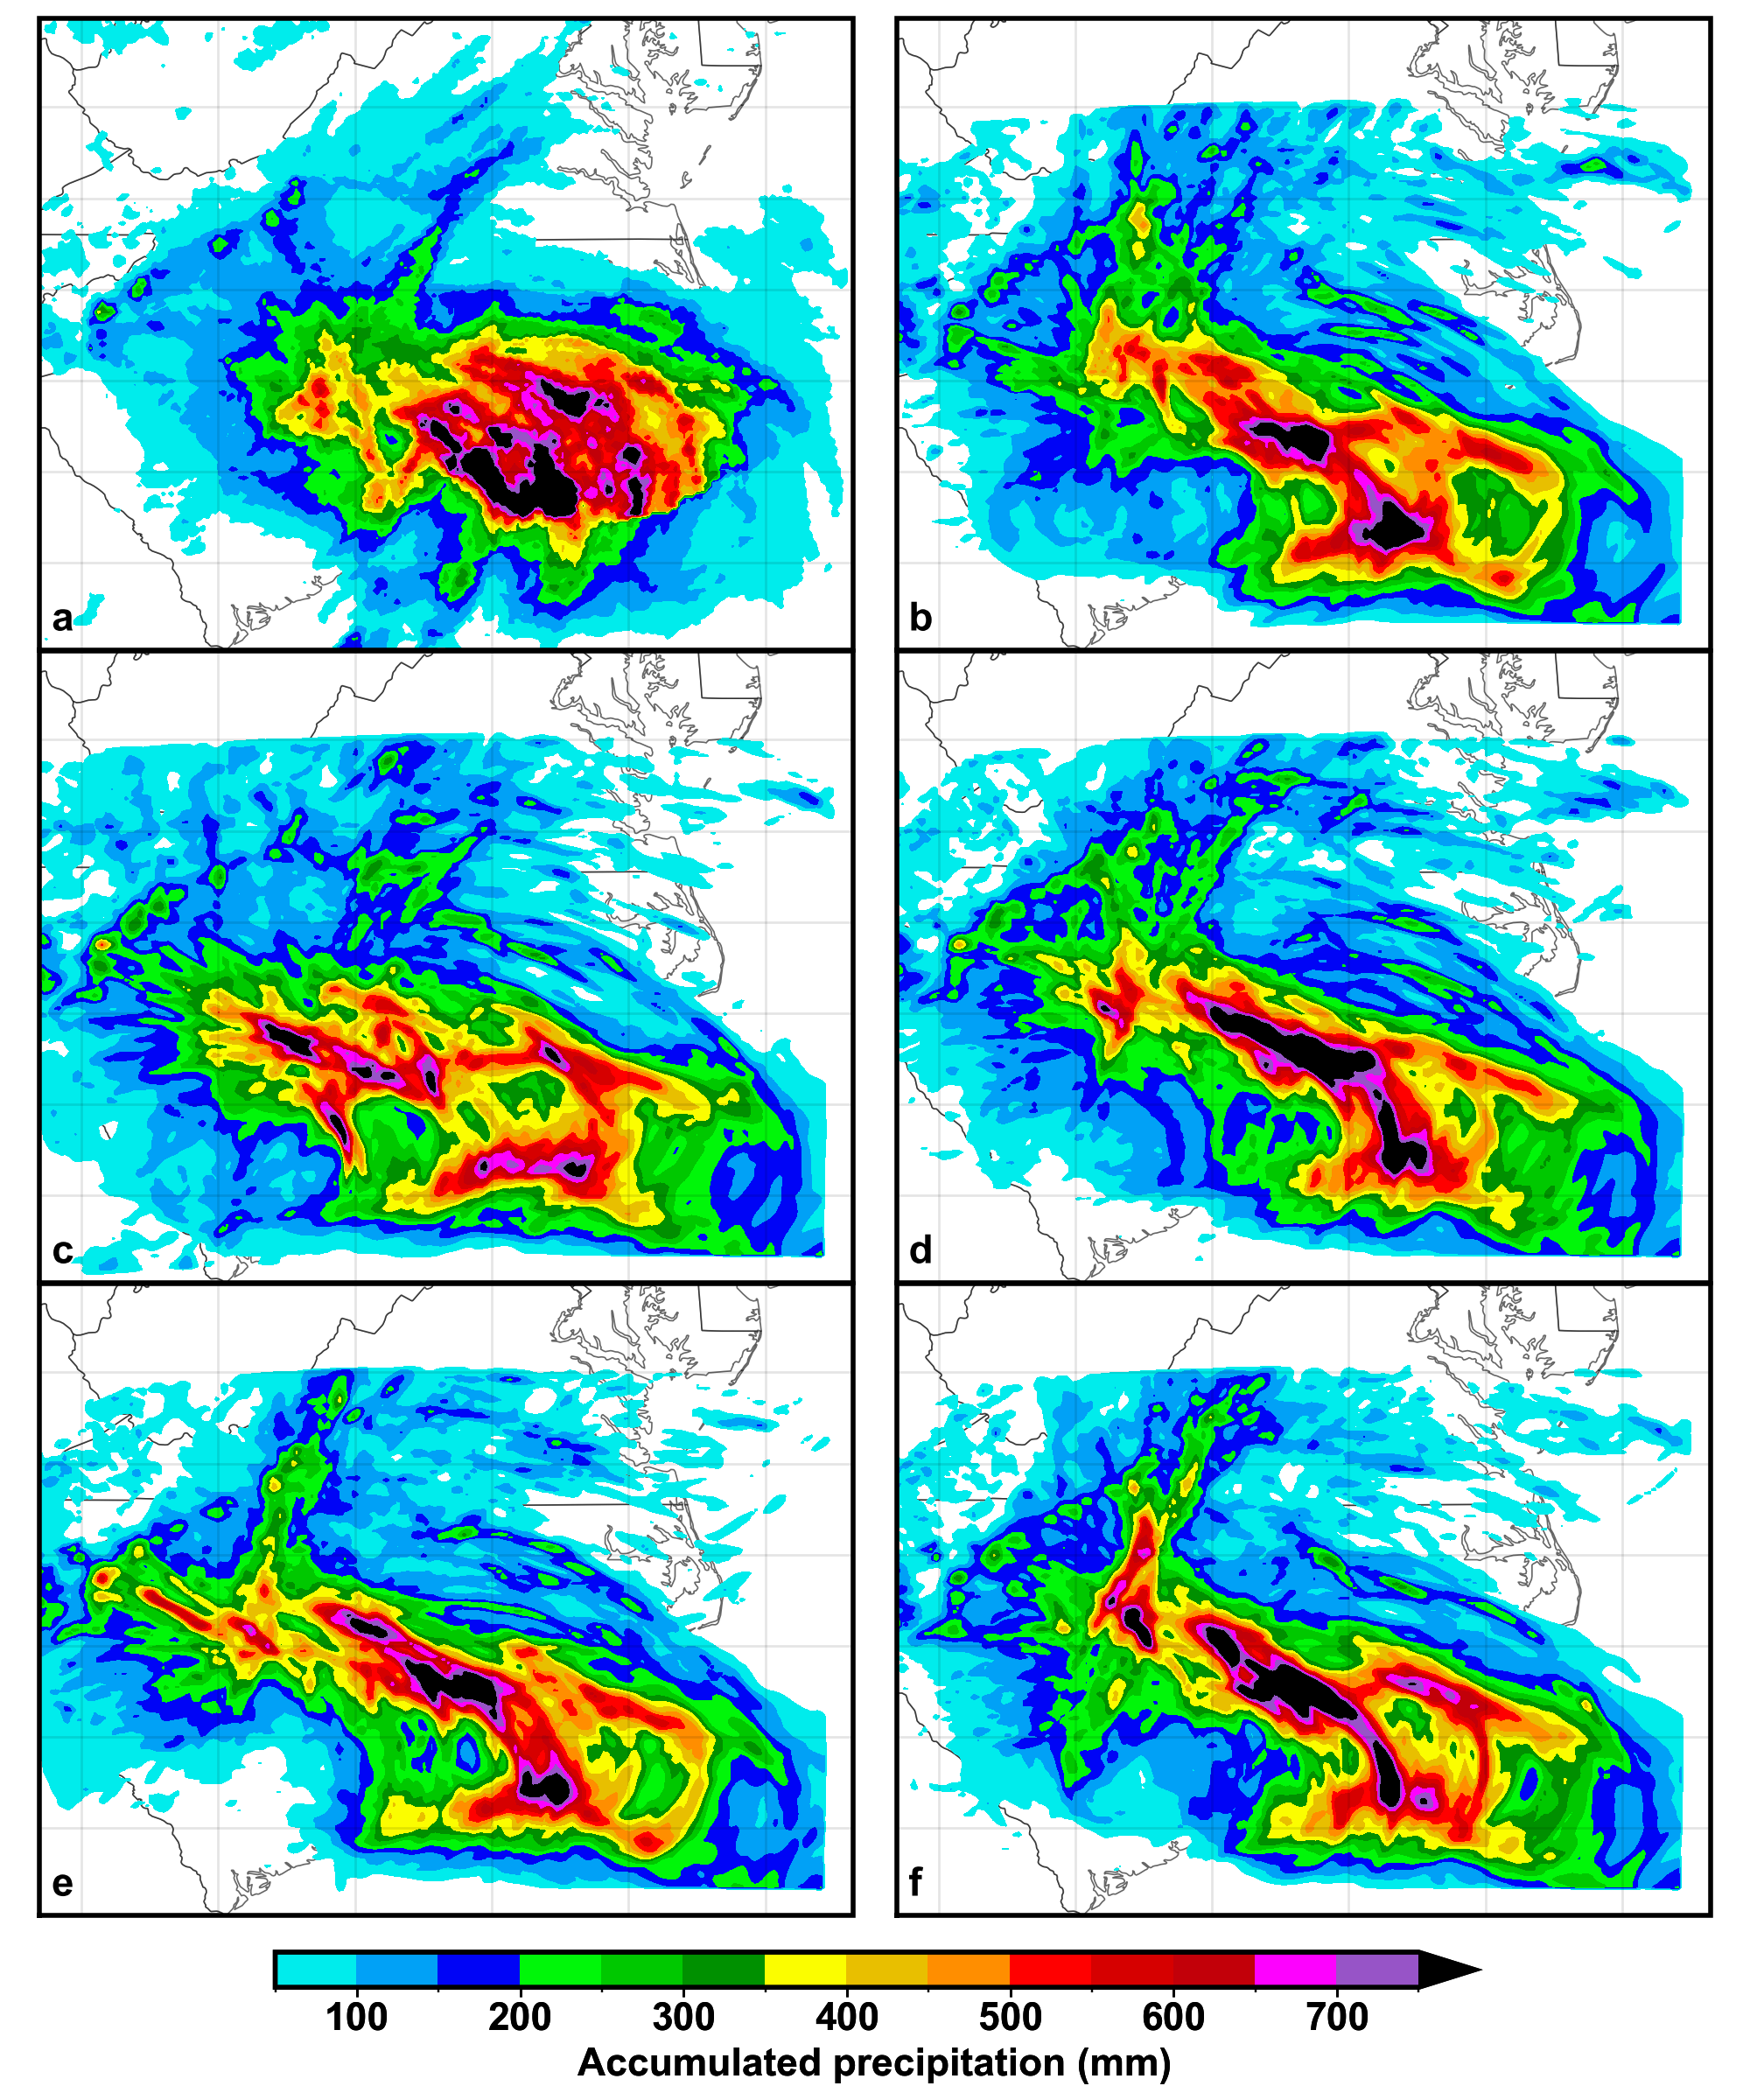

In [355]:
fig= pplt.figure(facecolor='white',space=0.01, figsize=(10,12))
axes= fig.subplots(nrows=3,ncols=2,subplot_kw={'projection': cartopy.crs.PlateCarree()})
ax= axes[0,0]
_rain= rains.sel(time= pd.to_datetime(rain.Time.values)).values.squeeze().sum(axis=0)
# lons=rains.XLONG.values; lats= rain.XLAT.values
cmap, norm = from_levels_and_colors(np.arange(1,315,10), [cmap_precip(num/295) for num in np.arange(1,305,10)])
map=ax.contourf(rains.x.values, rains.y.values, _rain, cmap=cmap_precip, levels= np.arange(50,800,50),vmax=800, extend='max')
ax.add_feature(cartopy.feature.STATES, alpha=0.6, facecolor='w', zorder=0)
ax.set_extent([-82.96, -74.03316, 32.04, 38.97469])


ax= axes[0,1]
rain= get_acc_rain(1)
_rain= rain.isel(Time=-1).values
lons=rain.XLONG.values; lats= rain.XLAT.values
# cmap, norm = from_levels_and_colors(np.arange(1,515,10), [cmap_precip(num/495) for num in np.arange(1,505,10)])
map=ax.contourf(lons, lats, _rain, cmap=cmap_precip, levels= np.arange(50,800,50),vmax=800,extend='max')
ax.add_feature(cartopy.feature.STATES, alpha=0.6, facecolor='w', zorder=0)
ax.set_extent([-82.96, -74.03316, 32.04, 38.97469])

ax= axes[1,0]
rain= get_acc_rain(2)
_rain= rain.isel(Time=-1).values
lons=rain.XLONG.values; lats= rain.XLAT.values
# cmap, norm = from_levels_and_colors(np.arange(1,515,10), [cmap_precip(num/495) for num in np.arange(1,505,10)])
map=ax.contourf(lons, lats, _rain, cmap=cmap_precip, levels= np.arange(50,800,50),vmax=800,extend='max')
ax.add_feature(cartopy.feature.STATES, alpha=0.6, facecolor='w', zorder=0)
ax.set_extent([-82.96, -74.03316, 32.04, 38.97469])

ax= axes[1,1]
rain= get_acc_rain(3)
_rain= rain.isel(Time=-1).values
lons=rain.XLONG.values; lats= rain.XLAT.values
# cmap, norm = from_levels_and_colors(np.arange(1,515,10), [cmap_precip(num/495) for num in np.arange(1,505,10)])
map=ax.contourf(lons, lats, _rain, cmap=cmap_precip, levels= np.arange(50,800,50),vmax=800,extend='max')
ax.add_feature(cartopy.feature.STATES, alpha=0.6, facecolor='w', zorder=0)
ax.set_extent([-82.96, -74.03316, 32.04, 38.97469])

ax= axes[2,0]
rain= get_acc_rain(4)
_rain= rain.isel(Time=-1).values
lons=rain.XLONG.values; lats= rain.XLAT.values
# cmap, norm = from_levels_and_colors(np.arange(1,515,10), [cmap_precip(num/495) for num in np.arange(1,505,10)])
map=ax.contourf(lons, lats, _rain, cmap=cmap_precip, levels= np.arange(50,800,50),vmax=800,extend='max')
ax.add_feature(cartopy.feature.STATES, alpha=0.6, facecolor='w', zorder=0)
ax.set_extent([-82.96, -74.03316, 32.04, 38.97469])

ax= axes[2,1]
rain= get_acc_rain(5)
_rain= rain.isel(Time=-1).values
lons=rain.XLONG.values; lats= rain.XLAT.values
# cmap, norm = from_levels_and_colors(np.arange(1,515,10), [cmap_precip(num/495) for num in np.arange(1,505,10)])
map=ax.contourf(lons, lats, _rain, cmap=cmap_precip, levels= np.arange(50,800,50),vmax=800,extend='max')
ax.add_feature(cartopy.feature.STATES, alpha=0.6, facecolor='w', zorder=0)
ax.set_extent([-82.96, -74.03316, 32.04, 38.97469])
cb=fig.colorbar(loc='b',mappable=map,label='Accumulated precipitation (mm)', length=0.7, ticks=100, minorticks=50);

axes.format(abc=True, abcloc='ll');
# fig.format(ylabel=)'Accumulated precipitation (mm)');

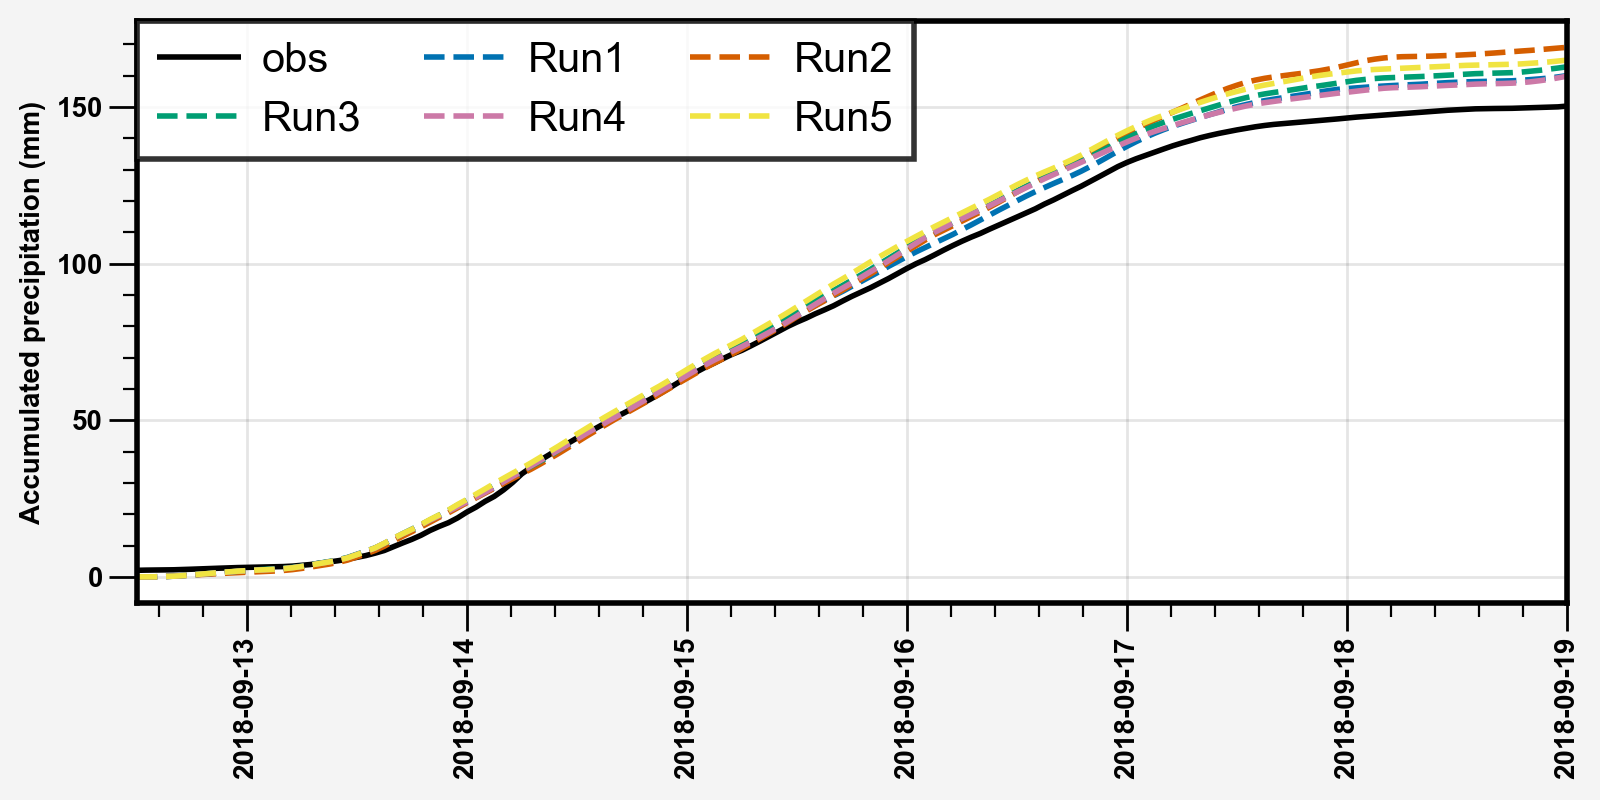

In [385]:
#domain -82.96, -74.03316, 32.04, 38.97469
xmin= -82.96; xmax=-74.03; ymin=32.04; ymax=38.97
fig= pplt.figure(figsize=(8,4))
ax= fig.add_subplot(111)
_rain= rains.sel(x=slice(xmin,xmax), y=slice(ymax,ymin)).mean(dim=['x','y']).cumsum()
ax.plot(_rain.time, _rain.values, label='obs', color='k')
rain= get_acc_rain(1)
_rain= rain.where((rain.XLAT> ymin)& (rain.XLAT<ymax) & (rain.XLONG>xmin) & (rain.XLONG<xmax)).mean(dim=['south_north',
                                                                                                          'west_east'])
ax.plot(_rain.Time, _rain.values, label='Run1', color='C0', linestyle='dashed')
rain= get_acc_rain(2)
_rain= rain.where((rain.XLAT> ymin)& (rain.XLAT<ymax) & (rain.XLONG>xmin) & (rain.XLONG<xmax)).mean(dim=['south_north',
                                                                                                          'west_east'])
ax.plot(_rain.Time, _rain.values, label='Run2', color='C1', linestyle='dashed')
rain= get_acc_rain(3)
_rain= rain.where((rain.XLAT> ymin)& (rain.XLAT<ymax) & (rain.XLONG>xmin) & (rain.XLONG<xmax)).mean(dim=['south_north',
                                                                                                          'west_east'])
ax.plot(_rain.Time, _rain.values, label='Run3', color='C2', linestyle='dashed')
rain= get_acc_rain(4)
_rain= rain.where((rain.XLAT> ymin)& (rain.XLAT<ymax) & (rain.XLONG>xmin) & (rain.XLONG<xmax)).mean(dim=['south_north',
                                                                                                          'west_east'])
ax.plot(_rain.Time, _rain.values, label='Run4', color='C3', linestyle='dashed')
rain= get_acc_rain(5)
_rain= rain.where((rain.XLAT> ymin)& (rain.XLAT<ymax) & (rain.XLONG>xmin) & (rain.XLONG<xmax)).mean(dim=['south_north',
                                                                                                          'west_east'])
ax.plot(_rain.Time, _rain.values, label='Run5', color='C4', linestyle='dashed')
ax.set_xlim([_rain.Time[0], _rain.Time[-1]])
ax.legend()
fig.format(ylabel='Accumulated precipitation (mm)', fontsize=10, xlabel='');

In [77]:
for t in range(len(rain)):
    if t%10==0:
        print('%d/%d'%(t,len(rain)))
    time= rain.Time[t].values
    fig, axes= plt.subplots(1,1,facecolor='white',subplot_kw={'projection': cartopy.crs.PlateCarree()})
    ax= axes
    _rain= rain[t,:,:]
    lons=rain.XLONG.values; lats= rain.XLAT.values
    cmap, norm = from_levels_and_colors(np.arange(1,115,10), [cmap_precip(num/95) for num in np.arange(1,105,10)])
    map=ax.pcolormesh(lons, lats, _rain, cmap=cmap, norm=norm)
    ax.add_feature(cartopy.feature.STATES, alpha=0.6, facecolor='w', zorder=0)
    ax.set_title(pd.to_datetime(time).strftime('%Y-%m-%dT%H:%M:%S'))
    section= pd.to_datetime(dict_hurricanes['Florence']['datetime']).get_loc(time, method='nearest')
    locs= np.stack(dict_hurricanes['Florence']['points'])[:section+1,:]
    ax.plot(locs[:,0], locs[:,1], 'r-', linewidth=2, marker='o', transform=cartopy.crs.PlateCarree())
    ax.coastlines()
    ax.set_extent([-86.96, -74.03316, 30.04, 40.97469])
    cb=fig.colorbar(mappable=map,fraction=0.02, ax=axes, pad=0.01)
    cb.set_label('Rainfall rate (mm/hr)')    
    fig.savefig('src/img%04d.png'%t)
    plt.close();
plt.show();

0/91


/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in 

10/91


/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in 

20/91


/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in 

30/91


/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in 

40/91


/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in 

50/91


/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in 

60/91


/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in 

70/91


/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in 

80/91


/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in 

90/91


/home/ZhiLi/.conda/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


In [23]:
np.array(rains)[[0,5,10,1,6,11,2,7,12,3,8,13,4,9,14]].shape

(15, 126, 126)

/home/allen/miniconda3/envs/wrf/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1703: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/allen/miniconda3/envs/wrf/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1703: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/allen/miniconda3/envs/wrf/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1703: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which 

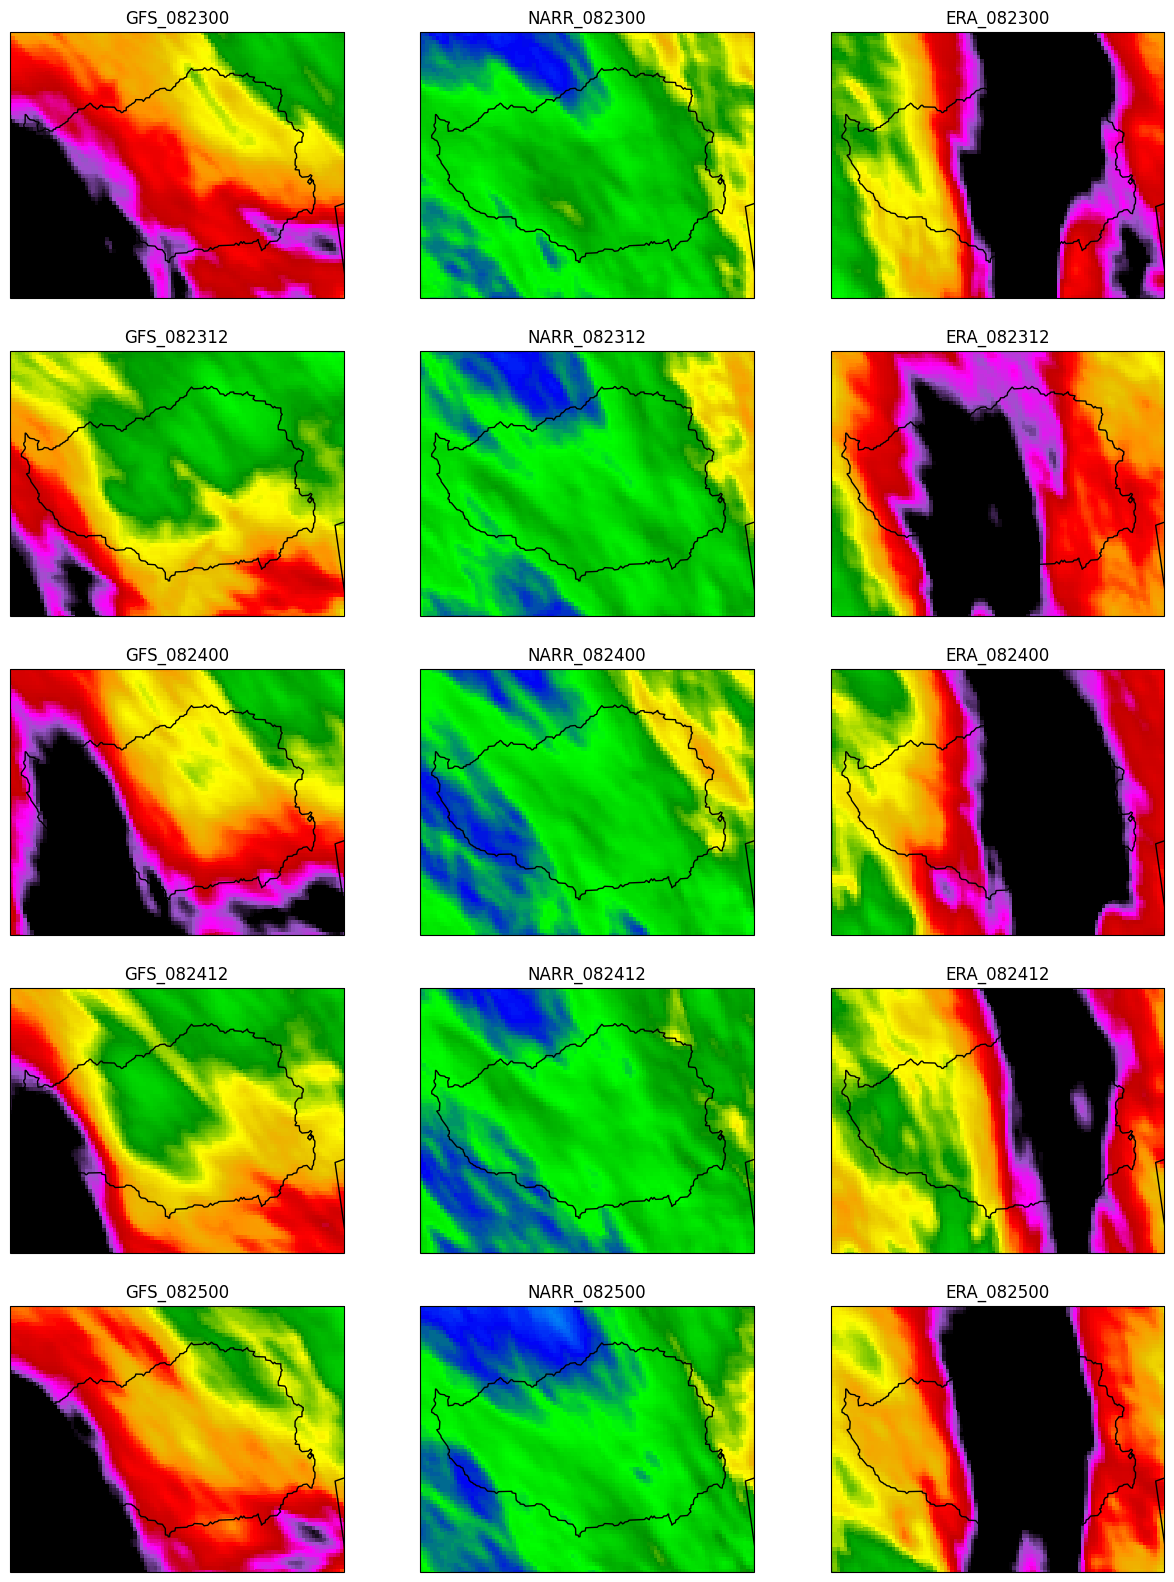

In [26]:
fig,ax= plt.subplots(5,3,figsize=(15,20), subplot_kw={'projection':proj})
for i in range(len(folders)):
    rain= np.array(rains)[[0,5,10,1,6,11,2,7,12,3,8,13,4,9,14]][i]
    ax[i//3,i%3].pcolormesh(rains[0].XLONG, rains[0].XLAT, rain.squeeze(), transform=ccrs.PlateCarree(), cmap=pyart.graph.cm.NWSRef, vmin=0, vmax=1600)
    ax[i//3,i%3].set_title(np.array(folders)[[0,5,10,1,6,11,2,7,12,3,8,13,4,9,14]][i])
    ax[i//3,i%3].set_extent([-96,-95,29.5,30.1])
    ax[i//3,i%3].add_feature(feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none'))
    ax[i//3,i%3].add_feature(feature.NaturalEarthFeature(
            category='physical',
            name='lakes',
            scale='50m',
            facecolor='none'))
    ax[i//3,i%3].coastlines('50m')
    ax[i//3,i%3].add_feature(feature.LAKES, alpha=0.5)
    ax[i//3,i%3].add_feature(feature.BORDERS, linestyle='-', alpha=.5)
    domain.plot(color='None',edgecolor='k',ax=ax[i//3,i%3],transform=ccrs.PlateCarree())
#     ax[i//2,i%2].gridlines()
plt.show();

## Compare to rain gauges

In [32]:
gauge_loc= gpd.read_file('../rainguageHarris/rainguageHarris/Rain_gauges.shp', converters={'Site_ID': int}).to_crs('EPSG:4326')
gauge_loc= gpd.clip(gauge_loc, domain)
gauge_loc= gauge_loc[[True if _id not in [2060, 135, 755, 1175, 1685] else False for _id in gauge_loc.Site_ID]]
gauge_lon= xr.Variable('lon',gauge_loc.Longitude.values)
gauge_lat= xr.Variable('lat',gauge_loc.Latitude.values)
gauge_ind= gauge_loc.Site_ID.tolist()
gauge= pd.read_csv('../rainguageHarris/rainguageHarris/Harvey_RainGauge.csv', index_col=[0])


In [33]:
ncep_gauge= ncep.sel(band=1,x=gauge_lon, y =gauge_lat, method='nearest')

In [34]:
from scipy.stats import spearmanr

In [38]:
gauge_loc['ncep_CC']= [spearmanr(ncep_gauge.isel(lon=i,lat=i).sel(Time=slice('20170825010000', '20170829230000')),
                                 gauge[str(int(gauge_ind[i]))]*25.4)[0] for i in range(len(gauge_ind))]

<AxesSubplot:>

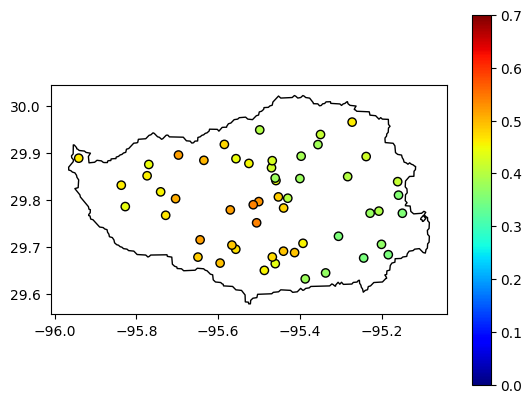

In [75]:
ax= gauge_loc.plot(column='ncep_CC', cmap='jet', legend=True, vmin=0,vmax=0.7,edgecolor='k')
domain.plot(ax=ax, color='None', edgecolor='k')

In [65]:
array=np.zeros((16,54)) * np.nan
array[0]= gauge_loc['ncep_CC'].values

In [53]:
gauge.set_index('Time', inplace=True)

In [54]:
gauge.index=pd.to_datetime(gauge.index)

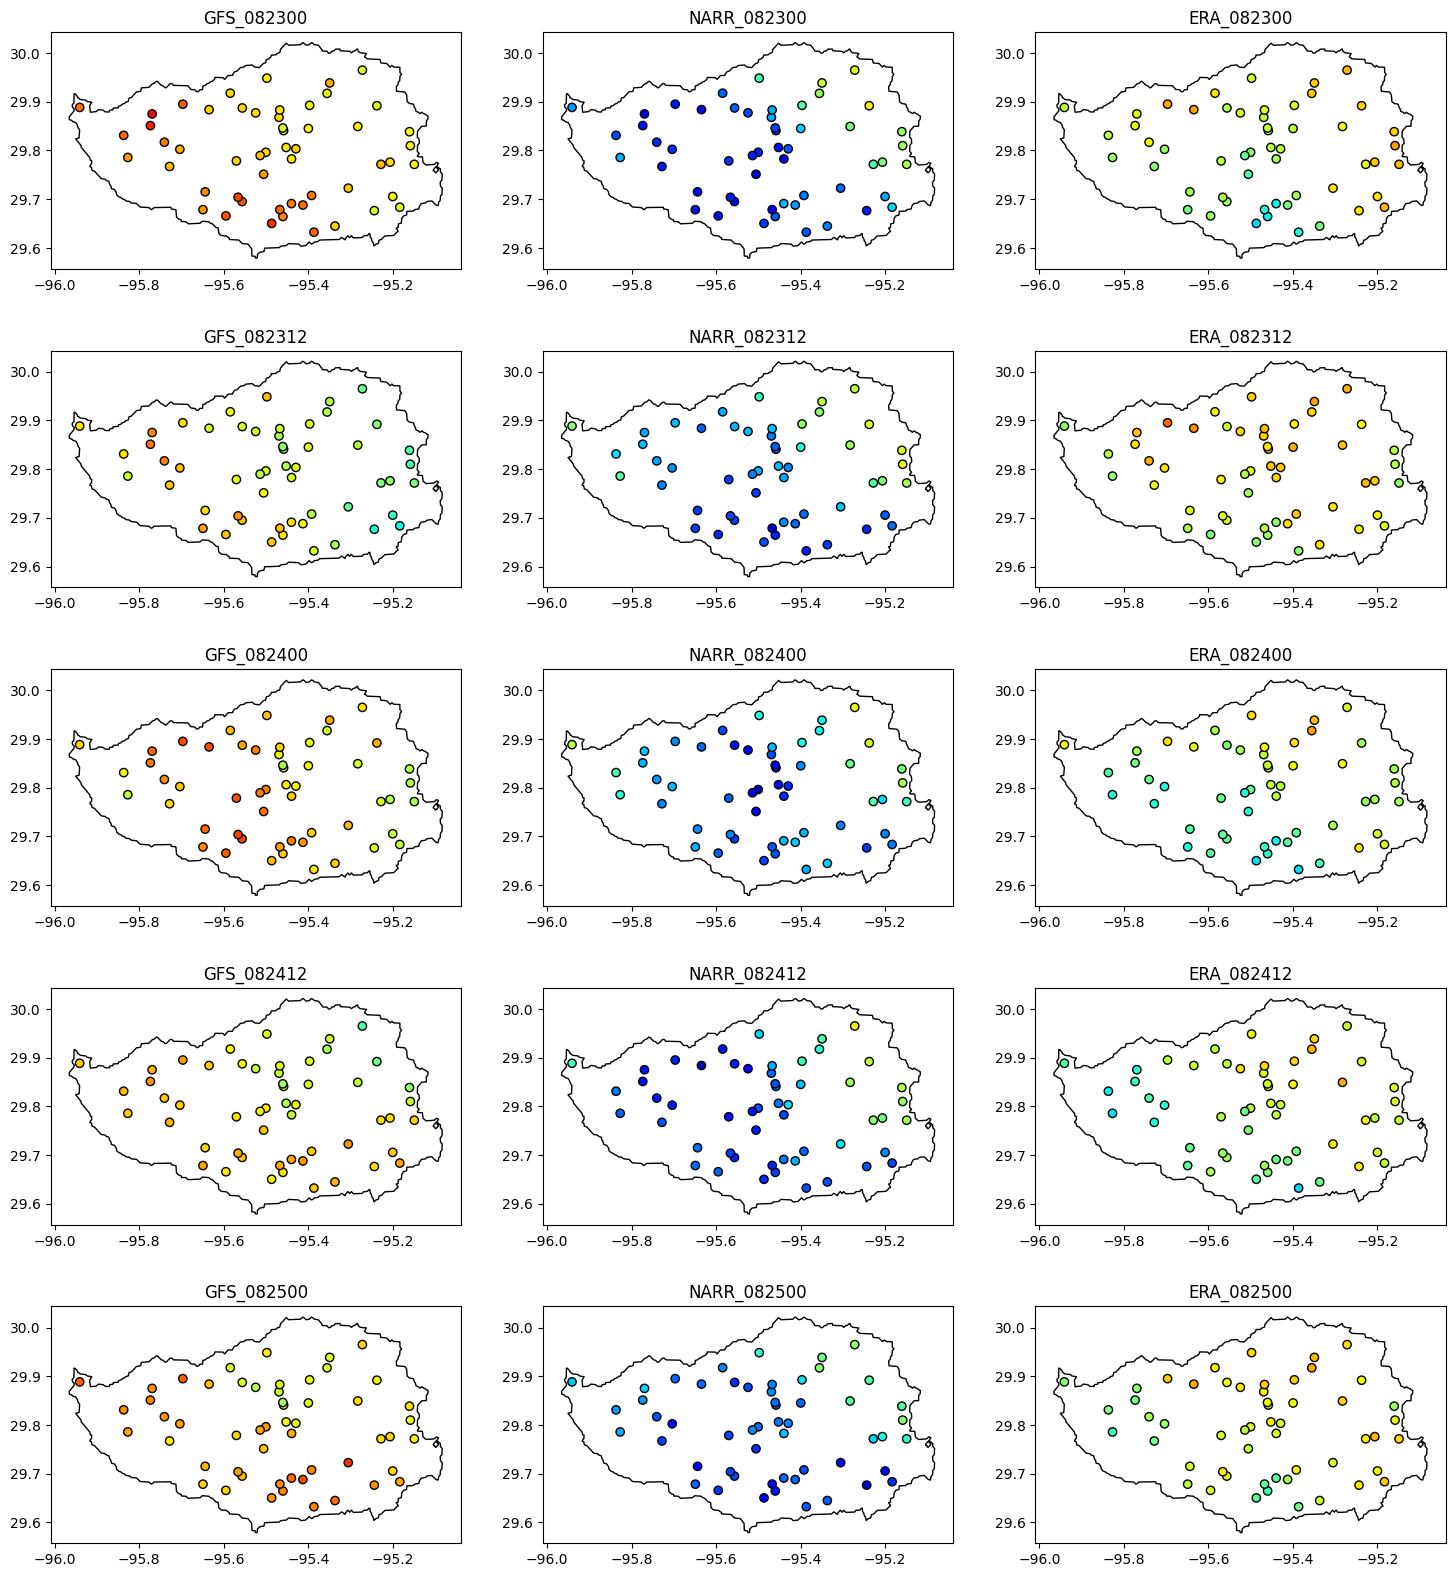

In [68]:
fig,ax=plt.subplots(5,3,figsize=(18,20))
coords= ll_to_xy(nc,gauge_lat, gauge_lon)
inds=np.array([0,5,10,1,6,11,2,7,12,3,8,13,4,9,14])
for i in range(len(folders)):
    folder= folder= np.array(folders)[inds][i]
    fname= glob(os.path.join('..',folder,file))[0]
    nc= Dataset(fname, 'r')
    rain= getvar(nc,'RAINNC', ALL_TIMES).isel(west_east=coords[0], south_north=coords[1]).sel(Time=slice('20170825000000', '20170829200000'))
    rate= np.diff(rain, axis=0)
    gauge_loc['mem%d_CC'%i]= [spearmanr(rate[:,i],gauge[str(int(gauge_ind[i]))].loc['20170825000000':'20170829200000']*25.4)[0] for i in range(len(gauge_ind))]
    gauge_loc.plot(column='mem%d_CC'%i, cmap='jet', legend=False, ax=ax[i//3,i%3], vmin=0, vmax=0.7, edgecolor='k')
    domain.plot(ax=ax[i//3,i%3], color='None', edgecolor='k')
    ax[i//3,i%3].set_title(folder)
    array[inds[i]+1]= gauge_loc['mem%d_CC'%i].values

/home/allen/miniconda3/envs/wrf/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


[]

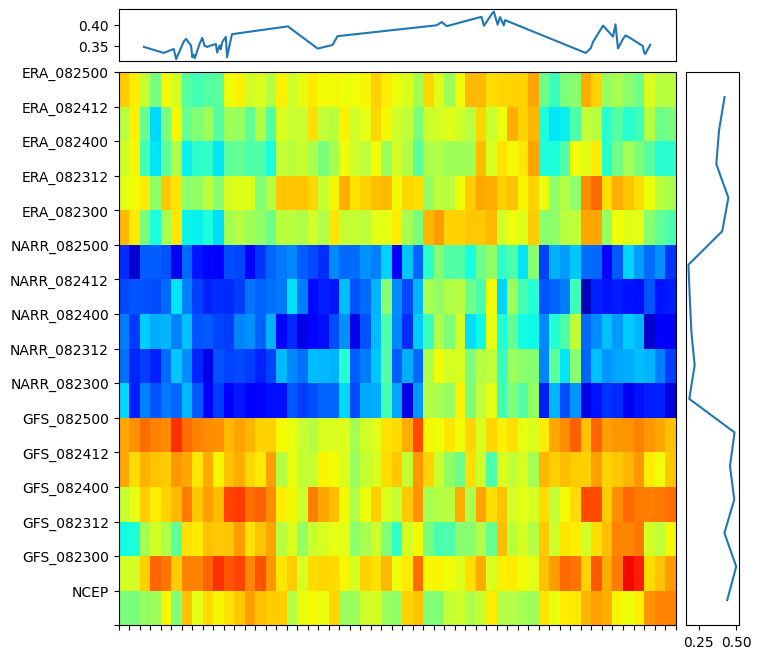

In [69]:
fig= plt.figure(figsize=(8,8))
grid= fig.add_gridspec(10,10)
ax= fig.add_subplot(grid[1:,:-1])
ax.pcolormesh(np.array(gauge_ind).astype(str), [' ','NCEP']+folders, array, cmap='jet', vmin=0, vmax=0.7)
ax.set_xticklabels([])
ax=fig.add_subplot(grid[0,:-1])
ax.plot(gauge_ind, array.mean(axis=0))
ax.set_xticks([])
ax=fig.add_subplot(grid[1:,-1])
ax.plot( array.mean(axis=1), ['NCEP']+folders)
ax.set_yticks([])

In [70]:
def RMSE(x,y):
    return ((x-y)**2).mean()**0.5

In [71]:
array= np.zeros((16,54))* np.nan

<AxesSubplot:>

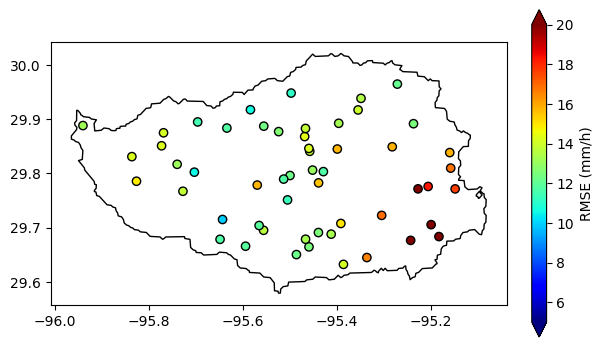

In [73]:
fig,ax= plt.subplots(1,1)
gauge_loc['ncep_RMSE']= [RMSE(ncep_gauge.isel(lon=i,lat=i).sel(Time=slice('20170825010000', '20170829230000')),
                              gauge[str(int(gauge_ind[i]))]*25.4).values for i in range(len(gauge_ind))]
gauge_loc['ncep_RMSE']= gauge_loc['ncep_RMSE'].astype(float)
cs=ax.scatter(gauge_loc.Longitude, gauge_loc.Latitude, 
           c=gauge_loc.ncep_RMSE, cmap='jet',
           vmin=5, vmax=20, edgecolor='k')
cb= fig.colorbar(mappable=cs, extend='both', fraction=0.03)
cb.set_label('RMSE (mm/h)')
domain.plot(ax=ax, color='None', edgecolor='k')

In [74]:
array[0,:]= gauge_loc['ncep_RMSE'].values

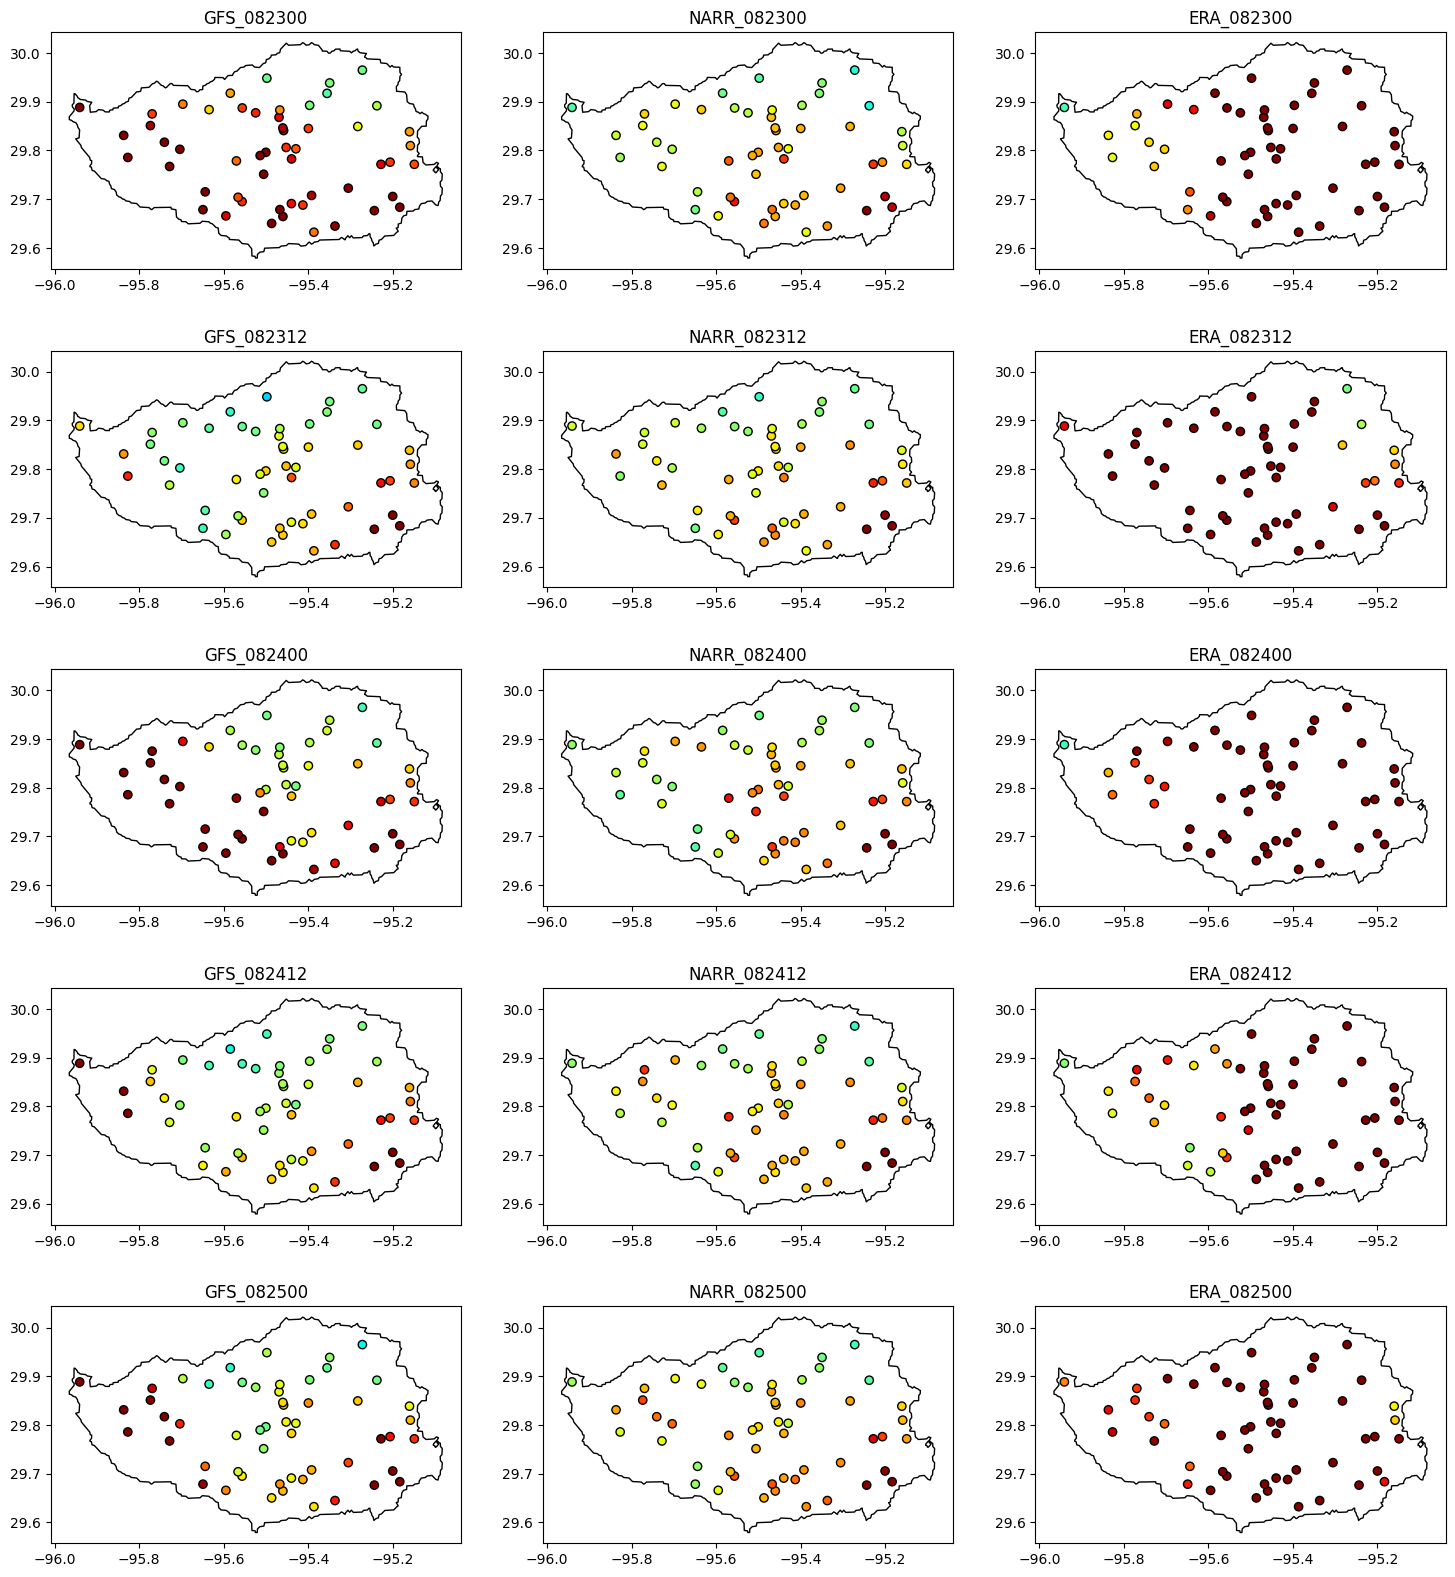

In [79]:
fig,ax=plt.subplots(5,3,figsize=(18,20))
coords= ll_to_xy(nc,gauge_lat, gauge_lon)

for i in range(len(folders)):
    folder= np.array(folders)[inds][i]
    fname= glob(os.path.join('..',folder,file))[0]
    nc= Dataset(fname, 'r')
    rain= getvar(nc,'RAINNC', ALL_TIMES).isel(west_east=coords[0], south_north=coords[1]).sel(Time=slice('20170825000000', '20170829200000'))
    rate= np.diff(rain, axis=0)
    gauge_loc['mem%d_RMSE'%i]= [RMSE(rate[:,i],gauge.loc['20170825000000':'20170829200000',str(int(gauge_ind[i]))]*25.4) for i in range(len(gauge_ind))]
    gauge_loc['mem%d_RMSE'%i]= gauge_loc['mem%d_RMSE'%i].astype(float)
    gauge_loc.plot(column='mem%d_RMSE'%i, cmap='jet', legend=False, ax=ax[i//3,i%3], vmin=5, vmax=20, edgecolor='k')
    domain.plot(ax=ax[i//3,i%3], color='None', edgecolor='k')
    ax[i//3,i%3].set_title(folder)
    array[(inds+1)[i]]= gauge_loc['mem%d_RMSE'%i].values

/home/allen/miniconda3/envs/wrf/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


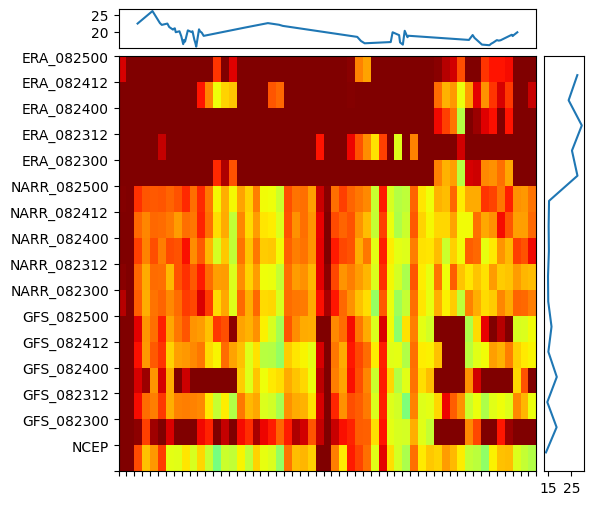

In [82]:
fig= plt.figure(figsize=(6,6))
grid= fig.add_gridspec(10,10)
ax= fig.add_subplot(grid[1:,:-1])
ax.pcolormesh(np.array(gauge_ind).astype(str), [' ','NCEP']+folders, array, cmap='jet', vmin=0, vmax=20)
ax.set_xticklabels([])
ax=fig.add_subplot(grid[0,:-1])
ax.plot(gauge_ind, array.mean(axis=0))
ax.set_xticks([])
ax=fig.add_subplot(grid[1:,-1])
ax.plot( array.mean(axis=1), ['NCEP']+folders)
ax.set_yticks([])
ax.set_xticks([15, 25]);

# Compare with NEXRAD L2 reflectivity

In [51]:
from siphon.radarserver import RadarServer,get_radarserver_datasets
from datetime import datetime, timedelta
import pyart
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

/home/allen/miniconda3/envs/wrf/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
rs = RadarServer('http://tds-nexrad.scigw.unidata.ucar.edu/thredds/radarServer/nexrad/level2/S3/')
query = rs.query()
query.stations('KHGX').time(datetime(2017,8,26,12,0,0))
catalog = rs.get_catalog(query)
catalog.datasets

/home/allen/miniconda3/envs/wrf/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['KHGX20170826_120158_V06']

In [54]:
ds = list(catalog.datasets.values())[0]
ds.access_urls

/home/allen/miniconda3/envs/wrf/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'OPENDAP': 'http://tds-nexrad.scigw.unidata.ucar.edu/thredds/dodsC/nexrad/level2/S3/2017/08/26/KHGX/KHGX20170826_120158_V06',
 'HTTPServer': 'http://tds-nexrad.scigw.unidata.ucar.edu/thredds/fileServer/nexrad/level2/S3/2017/08/26/KHGX/KHGX20170826_120158_V06',
 'CdmRemote': 'http://tds-nexrad.scigw.unidata.ucar.edu/thredds/cdmremote/nexrad/level2/S3/2017/08/26/KHGX/KHGX20170826_120158_V06'}

In [55]:
radar = pyart.io.read_nexrad_cdm(ds.access_urls['OPENDAP'])

/home/allen/miniconda3/envs/wrf/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
lat,lon,alt=radar.get_gate_lat_lon_alt(0)
ref= radar.get_field(0,'reflectivity')

/home/allen/miniconda3/envs/wrf/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
